<a href="https://colab.research.google.com/github/vaishu-230559/data-science/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your CSV file:


Saving nifty50_data.csv to nifty50_data (9).csv

Data Sample:
         Date      Open      High       Low     Close  Adj Close   Volume
0  19-08-2024  22099.34  22207.77  22070.31  22130.63   22125.57  2688472
1  20-08-2024  21972.35  22034.85  21890.01  21929.49   21921.21  1269708
2  21-08-2024  22129.54  22226.13  22055.21  22075.99   22080.11  2731281
3  22-08-2024  22304.61  22372.47  22214.46  22328.73   22329.10  1638112
4  23-08-2024  21953.17  21988.88  21878.57  21942.00   21935.55  2011727

Checking for missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-10-5d5f89046dda>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values if any
<ipython-input-10-5d5f89046dda>:32: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Day_of_Week'] = pd.to_datetime(data['Date']).dt.dayofweek



Linear Regression Metrics:
RMSE: 27.04
MAE: 20.67
R2 Score: 0.98

Random Forest Metrics:
RMSE: 30.71
MAE: 23.33
R2 Score: 0.97


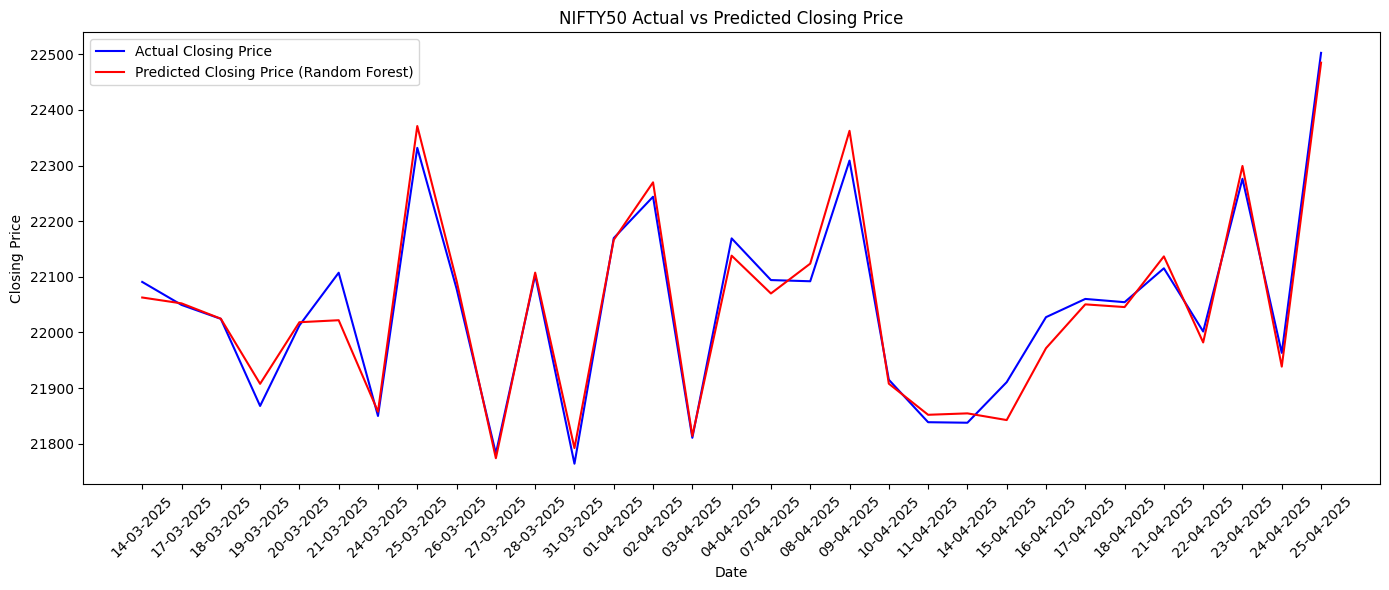

<ipython-input-10-5d5f89046dda>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


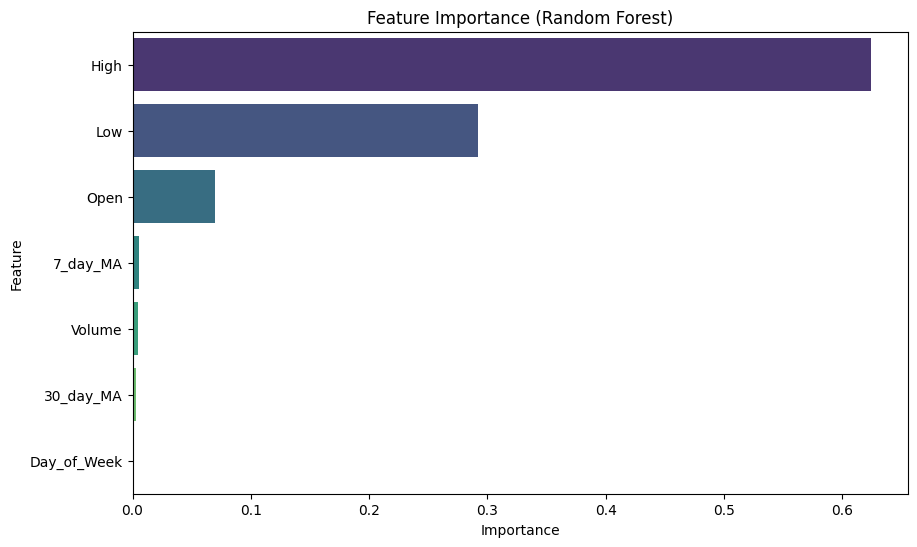

<ipython-input-10-5d5f89046dda>:93: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plt.plot(pd.to_datetime(data['Date']), data['Close'], label='Closing Price', color='blue')


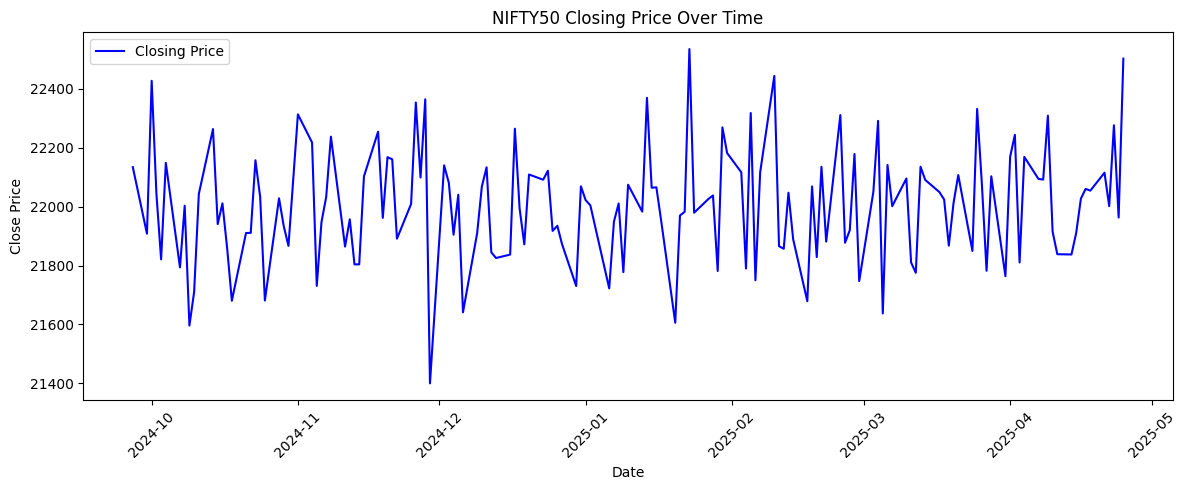

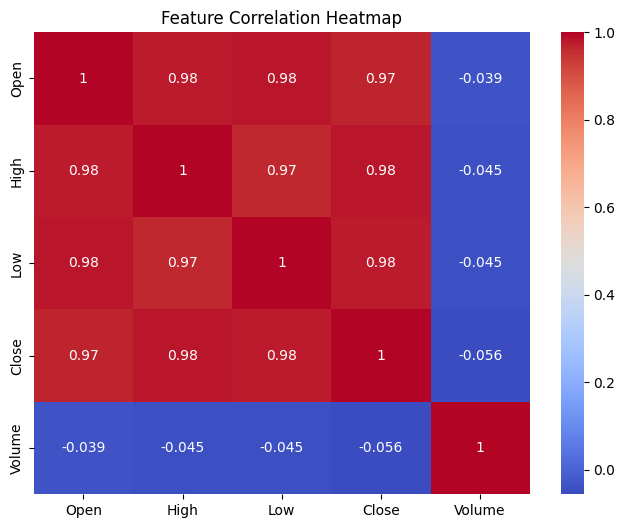

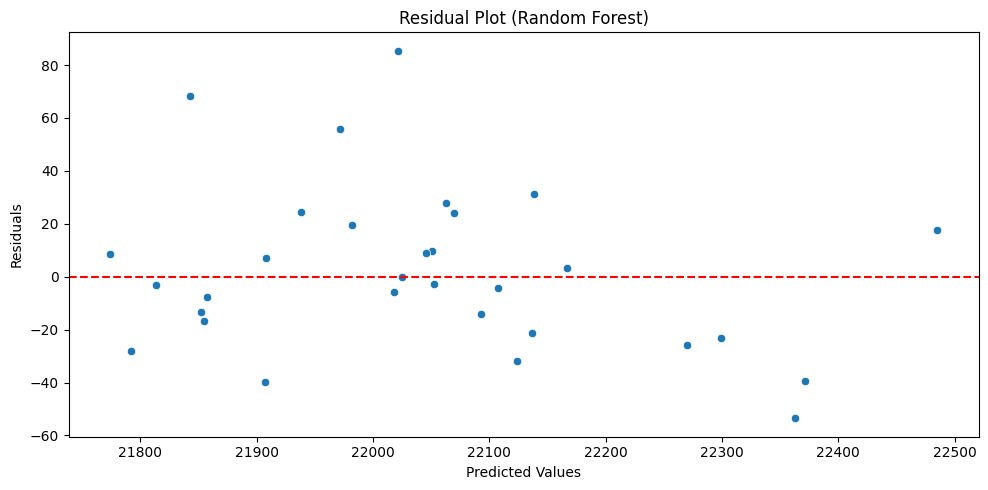


Project Completed Successfully.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import files  # To upload files in Google Colab

# Upload dataset
print("Please upload your CSV file:")
uploaded = files.upload()

# Assuming the uploaded file is named 'nifty50_data.csv'
# Replace 'nifty50_data.csv' with the actual name of the file if it's different
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display the first few rows of the data
print("\nData Sample:")
print(data.head())

# Data Cleaning
print("\nChecking for missing values:")
print(data.isnull().sum())

data.fillna(method='ffill', inplace=True)  # Forward fill missing values if any

# Feature Engineering
data['Day_of_Week'] = pd.to_datetime(data['Date']).dt.dayofweek
data['7_day_MA'] = data['Close'].rolling(window=7).mean()
data['30_day_MA'] = data['Close'].rolling(window=30).mean()

data.dropna(inplace=True)  # Drop initial NA from moving averages

# Feature Selection
features = ['Open', 'High', 'Low', 'Volume', 'Day_of_Week', '7_day_MA', '30_day_MA']
target = 'Close'

X = data[features]
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation
print("\nLinear Regression Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_preds)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, lr_preds):.2f}")
print(f"R2 Score: {r2_score(y_test, lr_preds):.2f}")

print("\nRandom Forest Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_preds)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, rf_preds):.2f}")
print(f"R2 Score: {r2_score(y_test, rf_preds):.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(data['Date'].iloc[-len(y_test):], y_test.values, label='Actual Closing Price', color='blue')
plt.plot(data['Date'].iloc[-len(y_test):], rf_preds, label='Predicted Closing Price (Random Forest)', color='red')
plt.title('NIFTY50 Actual vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()
plt.figure(figsize=(12,5))
plt.plot(pd.to_datetime(data['Date']), data['Close'], label='Closing Price', color='blue')
plt.title('NIFTY50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


#  Residual Plot (RF)
residuals = y_test - rf_preds
plt.figure(figsize=(10, 5))
sns.scatterplot(x=rf_preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

print("\nProject Completed Successfully.")



